In [2]:
# Importation de la bibliothèque NumPy pour les opérations numériques
import numpy as np

# Importation de la bibliothèque Pandas pour la manipulation et l'analyse des données
import pandas as pd

# Importation de la bibliothèque Matplotlib pour la visualisation des données
import matplotlib.pyplot as plt

# Importation de la fonction train_test_split de Scikit-learn pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Importation de la fonction accuracy_score de Scikit-learn pour évaluer la précision d'un modèle
from sklearn.metrics import accuracy_score

# Importation de la classe SVC de Scikit-learn pour les machines à vecteurs de support (SVM)
from sklearn.svm import SVC

In [3]:
# Importation de la bibliothèque os pour interagir avec le système d'exploitation
import os

# Liste les fichiers et dossiers dans le répertoire spécifié
path = os.listdir("Training")

# Dictionnaire pour mapper les classes de tumeurs à des valeurs numériques
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [4]:
# Importation de la bibliothèque OpenCV pour le traitement d'images
import cv2

# Initialisation des listes pour stocker les images et leurs étiquettes
X = []
Y = []

# Parcours de chaque classe dans le dictionnaire des classes
for cls in classes:
    # Construction du chemin vers le dossier de la classe
    pth = "Training/" + cls
    
    # Parcours de chaque fichier dans le dossier de la classe
    for j in os.listdir(pth):
        # Lecture de l'image en niveaux de gris
        img = cv2.imread(pth + '/' + j, 0)
        
        # Redimensionnement de l'image à 200x200 pixels
        img = cv2.resize(img, (200, 200))
        
        # Ajout de l'image à la liste X
        X.append(img)
        
        # Ajout de l'étiquette correspondante à la liste Y
        Y.append(classes[cls])


In [5]:
# Utilisation de la fonction unique de NumPy pour obtenir les valeurs uniques dans la liste Y
np.unique(Y)

array([0, 1])

In [6]:
# Conversion de la liste X en un tableau NumPy
X = np.array(X)

# Conversion de la liste Y en un tableau NumPy
Y = np.array(Y)

In [7]:
# Conversion du tableau Y en une série Pandas et comptage des occurrences de chaque valeur
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [8]:
# Affichage de la forme (dimensions) du tableau NumPy X
X.shape

(1222, 200, 200)

In [9]:
# Redimensionnement du tableau X pour qu'il ait une forme de (nombre d'images, nombre de pixels par image)
X_updated = X.reshape(len(X), -1)

# Affichage de la nouvelle forme du tableau X_updated
print(X_updated.shape)

(1222, 40000)


In [10]:
# Division des données en ensembles d'entraînement et de test
# 80% des données seront utilisées pour l'entraînement et 20% pour le test
# random_state=10 garantit que la division des données est reproductible
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=0.20)

In [11]:
# Affichage des formes des ensembles d'entraînement et de test
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [12]:
# Affichage des valeurs maximales et minimales de xtrain avant normalisation
print(xtrain.max(), xtrain.min())

# Affichage des valeurs maximales et minimales de xtest avant normalisation
print(xtest.max(), xtest.min())

# Normalisation des ensembles d'entraînement et de test en divisant par 255
xtrain = xtrain / 255
xtest = xtest / 255

# Affichage des valeurs maximales et minimales de xtrain après normalisation
print(xtrain.max(), xtrain.min())

# Affichage des valeurs maximales et minimales de xtest après normalisation
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
# Création d'un modèle de machine à vecteurs de support (SVM)
sv = SVC()

# Entraînement du modèle sur les données d'entraînement
sv.fit(xtrain, ytrain)

SVC()

In [14]:
# Affichage du score d'entraînement du modèle SVM
print("Training score:", sv.score(xtrain, ytrain))

# Affichage du score de test du modèle SVM
print("Testing score:", sv.score(xtest, ytest))

Training score: 0.9938587512794268
Testing score: 0.963265306122449


In [15]:
# Dictionnaire pour décoder les prédictions du modèle en étiquettes lisibles
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

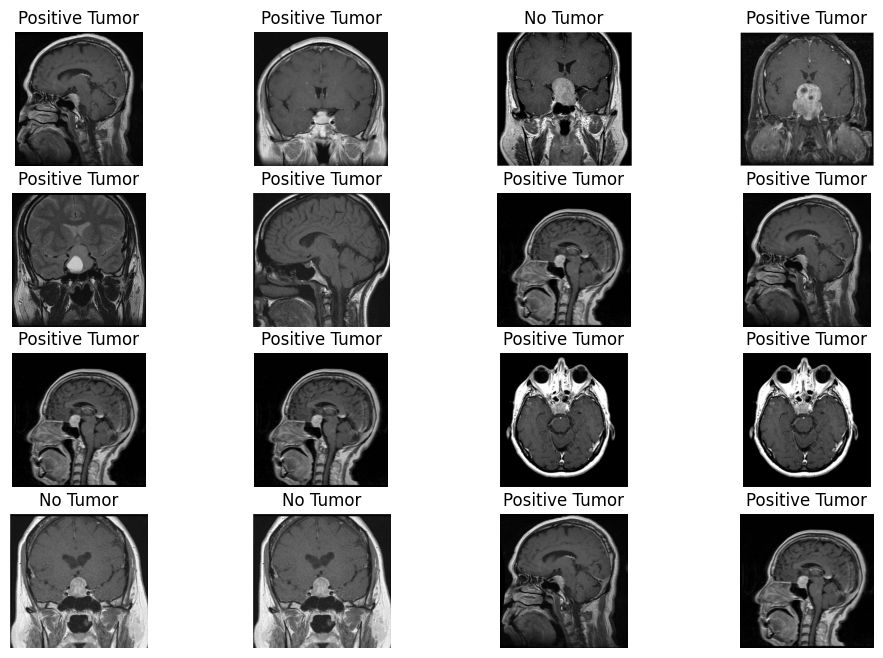

In [17]:
# Création d'une nouvelle figure pour la visualisation
plt.figure(figsize=(12, 8))

# Liste des fichiers dans le répertoire de test
p = os.listdir("Testing")
c = 1

# Parcours des premiers 16 fichiers dans le répertoire de test pour les images de tumeur pituitaire
for i in os.listdir("Testing/pituitary_tumor")[:16]:
    plt.subplot(4, 4, c)
    
    # Lecture de l'image en niveaux de gris
    img = cv2.imread("Testing/pituitary_tumor/" + i, 0)
    
    # Redimensionnement de l'image à 200x200 pixels
    img1 = cv2.resize(img, (200, 200))
    
    # Redimensionnement de l'image pour correspondre au format d'entrée du modèle et normalisation
    img1 = img1.reshape(1, -1) / 255
    
    # Prédiction de la classe de l'image
    p = sv.predict(img1)
    
    # Affichage de l'image avec le titre correspondant à la prédiction
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

# Affichage de la figure
plt.show()


In [18]:
ypred = sv.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.963265306122449


C:\Users\fanin\AppData\Local\Temp\ipykernel_33328\1557852433.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xtest_pca_2d[:, 0], xtest_pca_2d[:, 1], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')


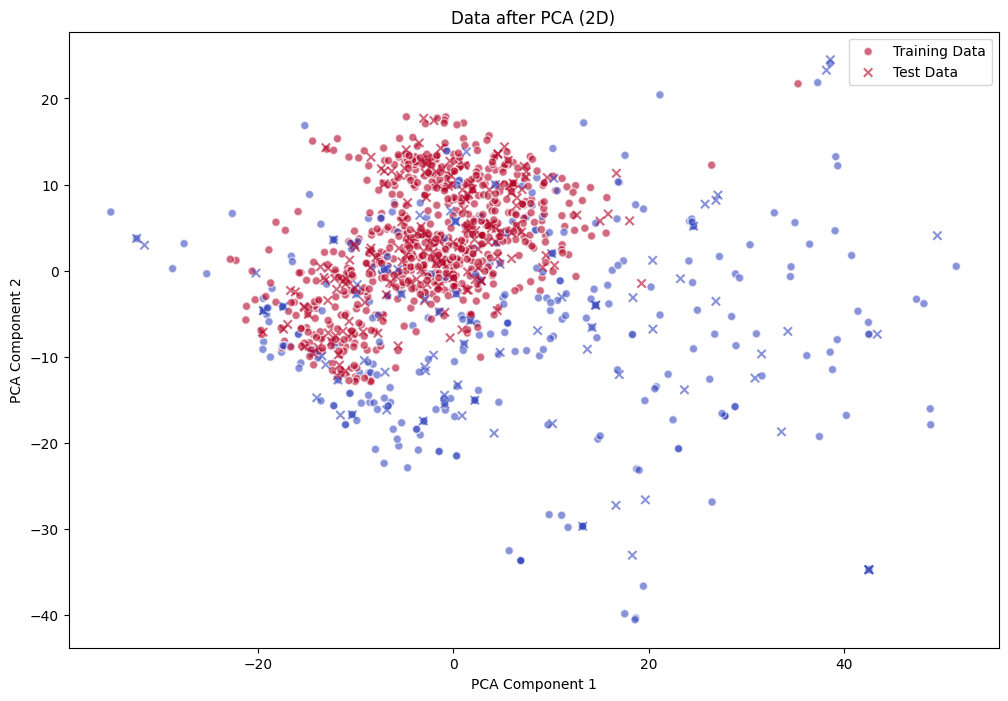

Classification Report (2D):
                 precision    recall  f1-score   support

      No Tumor       0.96      0.63      0.76        81
Positive Tumor       0.84      0.99      0.91       164

      accuracy                           0.87       245
     macro avg       0.90      0.81      0.84       245
  weighted avg       0.88      0.87      0.86       245



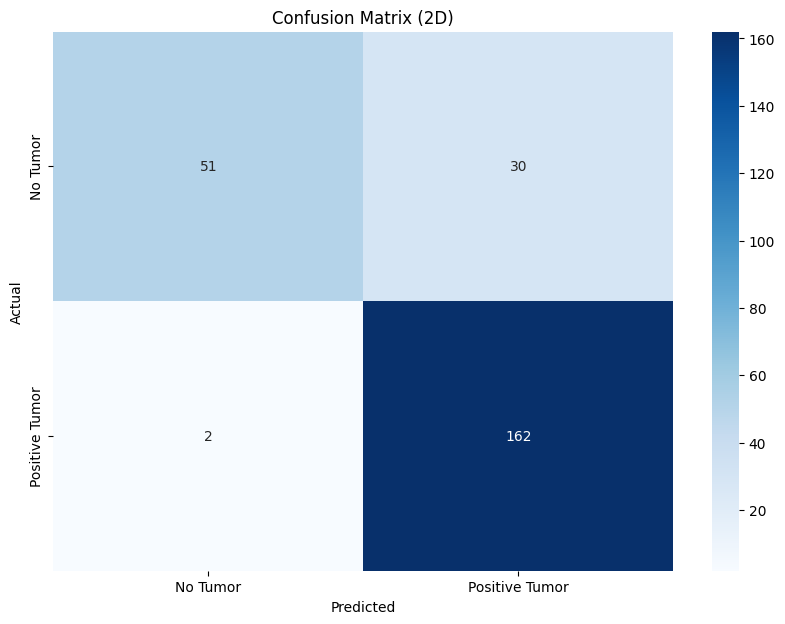

C:\Users\fanin\AppData\Local\Temp\ipykernel_33328\1557852433.py:52: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xtest_pca_2d[:, 0], xtest_pca_2d[:, 1], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')


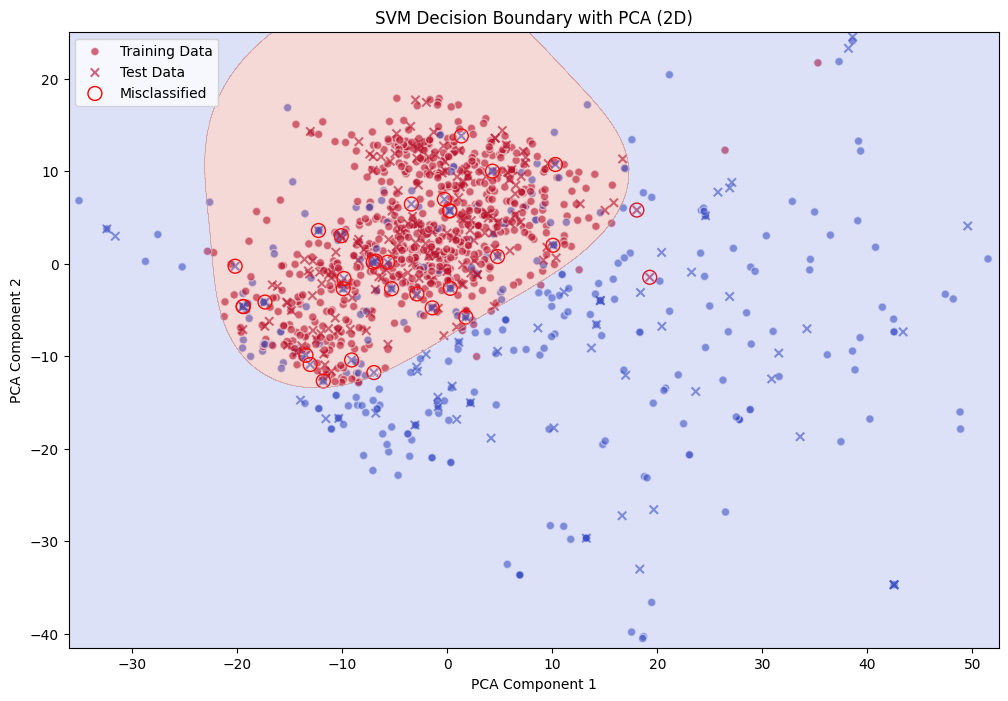

C:\Users\fanin\AppData\Local\Temp\ipykernel_33328\1557852433.py:98: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(xtest_pca_3d[:, 0], xtest_pca_3d[:, 1], xtest_pca_3d[:, 2], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')


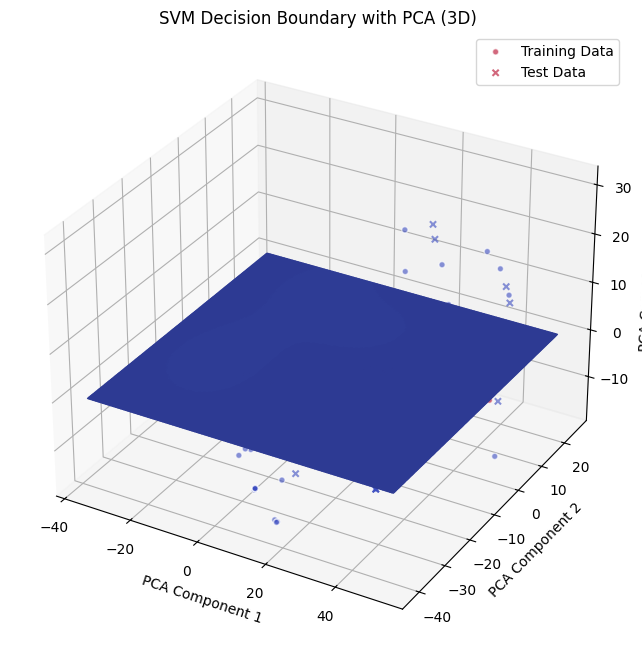

In [22]:
# Importation des bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Réduction de la dimensionnalité des données à 2 dimensions pour la visualisation
pca_2d = PCA(n_components=2)
xtrain_pca_2d = pca_2d.fit_transform(xtrain)
xtest_pca_2d = pca_2d.transform(xtest)

# Visualisation des données après réduction de dimensionnalité en 2D
plt.figure(figsize=(12, 8))
plt.scatter(xtrain_pca_2d[:, 0], xtrain_pca_2d[:, 1], c=ytrain, cmap='coolwarm', alpha=0.6, edgecolors='w', label='Training Data')
plt.scatter(xtest_pca_2d[:, 0], xtest_pca_2d[:, 1], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data after PCA (2D)')
plt.legend()
plt.show()

# Entraînement d'un nouveau modèle SVM sur les données réduites par PCA (2D)
sv_pca_2d = SVC(kernel='rbf', gamma='scale')
sv_pca_2d.fit(xtrain_pca_2d, ytrain)

# Prédiction des classes pour les ensembles d'entraînement et de test (2D)
ytrain_pred_2d = sv_pca_2d.predict(xtrain_pca_2d)
ytest_pred_2d = sv_pca_2d.predict(xtest_pca_2d)

# Affichage des scores de précision, rappel et F1 pour l'ensemble de test (2D)
print("Classification Report (2D):\n", classification_report(ytest, ytest_pred_2d, target_names=['No Tumor', 'Positive Tumor']))

# Création de la matrice de confusion pour l'ensemble de test (2D)
conf_matrix_2d = confusion_matrix(ytest, ytest_pred_2d)

# Visualisation de la matrice de confusion (2D)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_2d, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Positive Tumor'], yticklabels=['No Tumor', 'Positive Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2D)')
plt.show()

# Visualisation du plan de décision du SVM en 2D
plt.figure(figsize=(12, 8))

# Affichage des points de l'ensemble d'entraînement (2D)
plt.scatter(xtrain_pca_2d[:, 0], xtrain_pca_2d[:, 1], c=ytrain, cmap='coolwarm', alpha=0.6, edgecolors='w', label='Training Data')

# Affichage des points de l'ensemble de test (2D)
plt.scatter(xtest_pca_2d[:, 0], xtest_pca_2d[:, 1], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')

# Affichage des points mal classifiés (2D)
misclassified_2d = xtest_pca_2d[ytest != ytest_pred_2d]
plt.scatter(misclassified_2d[:, 0], misclassified_2d[:, 1], facecolors='none', edgecolors='r', s=100, label='Misclassified')

# Création d'une grille de points pour estimer la frontière de décision (2D)
h = .02  # taille de l'étape dans la grille
x_min, x_max = xtrain_pca_2d[:, 0].min() - 1, xtrain_pca_2d[:, 0].max() + 1
y_min, y_max = xtrain_pca_2d[:, 1].min() - 1, xtrain_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédiction des classes pour chaque point de la grille (2D)
Z = sv_pca_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage de la frontière de décision (2D)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary with PCA (2D)')
plt.legend()
plt.show()

# Réduction de la dimensionnalité des données à 3 dimensions pour la visualisation
pca_3d = PCA(n_components=3)
xtrain_pca_3d = pca_3d.fit_transform(xtrain)
xtest_pca_3d = pca_3d.transform(xtest)

# Entraînement d'un nouveau modèle SVM sur les données réduites par PCA (3D)
sv_pca_3d = SVC(kernel='rbf', gamma='scale')
sv_pca_3d.fit(xtrain_pca_3d, ytrain)

# Prédiction des classes pour les ensembles d'entraînement et de test (3D)
ytrain_pred_3d = sv_pca_3d.predict(xtrain_pca_3d)
ytest_pred_3d = sv_pca_3d.predict(xtest_pca_3d)

# Visualisation du plan de décision du SVM en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points de l'ensemble d'entraînement (3D)
ax.scatter(xtrain_pca_3d[:, 0], xtrain_pca_3d[:, 1], xtrain_pca_3d[:, 2], c=ytrain, cmap='coolwarm', alpha=0.6, edgecolors='w', label='Training Data')

# Affichage des points de l'ensemble de test (3D)
ax.scatter(xtest_pca_3d[:, 0], xtest_pca_3d[:, 1], xtest_pca_3d[:, 2], c=ytest, cmap='coolwarm', alpha=0.6, edgecolors='k', marker='x', label='Test Data')

# Création d'une grille de points pour estimer la frontière de décision (3D)
h = .5  # taille de l'étape dans la grille
x_min, x_max = xtrain_pca_3d[:, 0].min() - 1, xtrain_pca_3d[:, 0].max() + 1
y_min, y_max = xtrain_pca_3d[:, 1].min() - 1, xtrain_pca_3d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédiction des classes pour chaque point de la grille (2D)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = sv_pca_3d.predict(np.c_[grid, np.zeros(grid.shape[0])])
Z = Z.reshape(xx.shape)

# Affichage de la frontière de décision (2D)
ax.plot_surface(xx, yy, np.zeros_like(xx), facecolors=plt.cm.coolwarm(Z), alpha=0.2, rstride=1, cstride=1, antialiased=True)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('SVM Decision Boundary with PCA (3D)')
plt.legend()
plt.show()